# 원래 틱텍토 게임

In [1]:
# 틱택토 구현
import random

# 게임 상태
class State:
    # 초기화
    def __init__(self, pieces=None, enemy_pieces=None):
        # 돌 배치
        self.pieces = pieces if pieces != None else [0] * 9
        self.enemy_pieces = enemy_pieces if enemy_pieces != None else [0] * 9

    # 돌의 수 취득
    def piece_count(self, pieces):
        count = 0
        for i in pieces:
            if i == 1:
                count +=  1
        return count

    # 패배 여부 확인
    def is_lose(self):
        # 돌 3개 연결 여부
        def is_comp(x, y, dx, dy):
            for k in range(3):
                if y < 0 or 2 < y or x < 0 or 2 < x or \
                    self.enemy_pieces[x+y*3] == 0:
                    return False
                x, y = x+dx, y+dy
            return True

        # 배패 여부 확인
        if is_comp(0, 0, 1, 1) or is_comp(0, 2, 1, -1):
            return True
        for i in range(3):
            if is_comp(0, i, 1, 0) or is_comp(i, 0, 0, 1):
                return True
        return False

    # 무승부 여부 확인
    def is_draw(self):
        return self.piece_count(self.pieces) + self.piece_count(self.enemy_pieces) == 9

    # 게임 종료 여부 확인
    def is_done(self):
        return self.is_lose() or self.is_draw()

    # 다음 상태 얻기
    def next(self, action):
        pieces = self.pieces.copy()
        pieces[action] = 1
        return State(self.enemy_pieces, pieces)

    # 합법적인 수의 리스트 얻기
    def legal_actions(self):
        actions = []
        for i in range(9):
            if self.pieces[i] == 0 and self.enemy_pieces[i] == 0:
                actions.append(i)
        return actions

    # 선 수 여부 확인
    def is_first_player(self):
        return self.piece_count(self.pieces) == self.piece_count(self.enemy_pieces)

    # 문자열 표시
    def __str__(self):
        ox = ('o', 'x') if self.is_first_player() else ('x', 'o')
        str = ''
        for i in range(9):
            if self.pieces[i] == 1:
                str += ox[0]
            elif self.enemy_pieces[i] == 1:
                str += ox[1]
            else:
                str += '-'
            if i % 3 == 2:
                str += '\n'
        return str

# 미니맥스법

In [2]:
# 미니맥스법을 활용한 상태 가치 계산
def mini_max(state):
    # 패배 시, 상태 가치 -1
    if state.is_lose():
        return -1
    
    # 무승부 시, 상태 가치 0
    if state.is_draw():
        return  0

    # 합법적인 수의 상태 가치 계산
    best_score = -float('inf')
    for action in state.legal_actions():
        score = -mini_max(state.next(action))
        if score > best_score:
            best_score = score
            
    # 합법적인 수의 상태 가치값의 최대값 반환
    return best_score

# 미니맥스법을 활용한 행동 선택
def mini_max_action(state):
    # 합법적인 수의 상태 가치 계산
    best_action = 0
    best_score = -float('inf')
    for action in state.legal_actions():
        score = -mini_max(state.next(action))
        if score > best_score:
            best_action = action
            best_score  = score           

    # 합법적인 수의 상태 가치의 최대값을 가진 행동 반환
    return best_action

# 알파베타법

- 방법
  - alpha-beta alagorithm
  - 미니맥스법 개선한 탐색 알고리즘
  - 미니맥스법상에서 같은 계산 결과가 나오는 부분은 일지 않도록 처리(가지치기)함으로써, 고속계산 실현
```
$$ 수식표현 $$ 
```
  - $$ \alpha = \beta $$
  - $$ \alpha $$

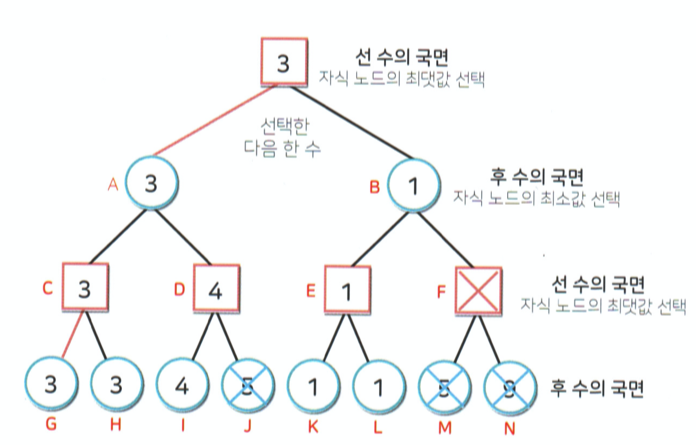

In [5]:
from IPython.display import Image
'''
- 그리스 문자
  - https://datascienceschool.net/view-notebook/e943c350244842a99ab4503fa50b8a6b/
- 설명 : 
  - 노드 I의 평가가 4이므로, 노드 D의 평가는 4이다. 
  - 노드 C의 평가는 3이므로, 노드 A의 평가는 3이다.
  - 따라서, 결과적으로 노드 D로 가지 않을 것이니, 노드 J를 탐색할 필요 없다
    - 특정한 노드의 평가가 특정값이 이상이 되기 때문에 탐색을 중단하는 것을 베타컷(𝛽-cut)
  - 노드 K,L은 평가가 1이다 => 노드 E는 무조건 1 => 노드 F는 갈필요가 없다
    - 노드의 평가가 특정값 이하가 되기 때문에 탐색을 중단하는 것을 알파컷(𝛼-cut)
'''
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/5_search/알파베타법_게임트리.png')

# 미니맥스법 플러스

In [7]:
# 조금 개선한 미니맥스법을 활용한 상태 가치 계산
# limit : 부모 노드의 베스트 스코어:상태가치값
def mini_max_plus(state, limit):
  # -------------------------------------------------------------
  # 패배 시, 상태 가치 -1
  if state.is_lose():
    return -1
  # 무승부 시, 상태 가치 0
  if state.is_draw():
    return 0
  # -------------------------------------------------------------

  # 합법적인 수의 상태 가치 계산 ---------------------------------------
  best_score = -float('inf')
  for action in state.legal_actions():
    # 이전방법 : 선수와 동일하게 후수에서도 가치가 높은 수를 선택해서 반환(끝까지 다가보고 판단)
    # 네가티브 맥스법를 사용하니, 베스트 점수도 -로 처리
    score = -mini_max_plus(state.next(action), -best_score)
    if score > best_score:
      best_score = score
      # 현재 나온게 5인데, 부모가 4이면 더 갈것도 없어서 중단  
      # 상태가지 계산의 재귀 루프에서 부모 노드는 현재 노드의 최소값을 선택
      # 현재 노드의 베스트 스코어가 부모 노드의 베스트 스코어를 넘으면 현재 노드는 사용되지 않으므로 탐색 종료
      if best_score >= limit:
        return best_score

  # 합법적인 수의 상태 가치의 최대값을 반환 -------------------------------
  return best_score

In [8]:
# 알파베타법을 활용한 상태 가치 계산
# alpha : 부모 노드의 부모 노드(자신, 최초) 베스트 스코어
# beta :  부모 노드의 베스트 스코어
def alpha_beta(state, alpha, beta):
    # 패배 시, 상태 가치 -1
    if state.is_lose():
        return -1
    # 무승부 시, 상태 가치 0
    if state.is_draw():
        return  0

    # 합법적인 수의 상태 가치 계산
    for action in state.legal_actions():
        # 알파, 베타의 좌우를 바꿔서 호출 => 알파 베타법의 핵심 구현방식 
        score = -alpha_beta(state.next(action), -beta, -alpha)
        # 수를 놓기 시작한 자산의 베스트 스코어이므로, 그 이상이 나오면 갱신
        if score > alpha:
            alpha = score
        # 부모가 자식보다 가치 평가가 낮으면 탐색 => 종료
        # 현재 노드의 베스트 스코어가 새로운 노드보다 크면 탐색 종료
        # 부모의 베스트 스코어이므로, 값이 커버리면 탐색 종료
        if alpha >= beta:
            # 알파로 종료
            return alpha

    # 합법적인 수의 상태 가치의 최대값을 반환
    return alpha

In [ ]:
# 알파베타법을 활용한 행동 선택
# 알파베타법이 빠르지만, 실력은 막상 막하이다
def alpha_beta_action(state):
    # 합법적인 수의 상태 가치 계산
    best_action = 0
    alpha       = -float('inf')
    str         = ['','']

    for action in state.legal_actions():
        # beta 초기값 : -float('inf'), best_score => alpha로 대체
        score = -alpha_beta(state.next(action), -float('inf'), -alpha)
        # 점수가 알파보다 크면
        if score > alpha:
            # 액션갱신
            best_action = action
            # 상태가치 갱싱
            alpha = score
            
        str[0] = '{}{:2d},'.format(str[0], action)
        str[1] = '{}{:2d},'.format(str[1], score)
    print('action:', str[0], '\nscore: ', str[1], '\n')            

    # 합법적인 수의 상태 가치값 중 최대값을 선택하는 행동 반환
    return best_action

# 시뮬레이션

In [9]:
# 알파베타법과 미니맥스법의 대전

# 상태 생성
state = State()

# 게임 종료 시까지 반복
while True:
    # 게임 종료 시
    if state.is_done():
        break

    # 행동 얻기
    if state.is_first_player():
        # 선수는 알파 베타법
        action = alpha_beta_action(state)
    else:
        # 후수는 미니 맥스법
        action = mini_max_action(state)        
        
    # 다음 상태 얻기
    state = state.next(action)

    # 문자열 표시
    print(state)
    print()

action:  0, 1, 2, 3, 4, 5, 6, 7, 8, 
score:   0, 0, 0, 0, 0, 0, 0, 0, 0, 

o--
---
---


o--
-x-
---


action:  1, 2, 3, 5, 6, 7, 8, 
score:   0, 0, 0, 0, 0, 0, 0, 

oo-
-x-
---


oox
-x-
---


action:  3, 5, 6, 7, 8, 
score:  -1,-1, 0, 0, 0, 

oox
-x-
o--


oox
xx-
o--


action:  5, 7, 8, 
score:   0,-1,-1, 

oox
xxo
o--


oox
xxo
ox-


action:  8, 
score:   0, 

oox
xxo
oxo


